In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [119]:
predict_amount = pd.read_csv('predict_amount.csv')
predict_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64790 entries, 0 to 64789
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   store_id  64790 non-null  int64  
 1   amount    64790 non-null  float64
 2   datetime  64790 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


In [120]:
predict_amount['datetime'] = pd.to_datetime(predict_amount['datetime'], format='%Y-%m-%d')

In [121]:
predict_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64790 entries, 0 to 64789
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   store_id  64790 non-null  int64         
 1   amount    64790 non-null  float64       
 2   datetime  64790 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 MB


In [131]:
def store_plot(dataset, start, end):
    sns.set_style('whitegrid')
    plt.figure(figsize=(26, 6))
    for i in dataset['store_id'].unique()[start:end]:
        dataset_ = dataset.loc[(dataset['store_id'] == i), ['amount', 'datetime']]
        group = (dataset_['amount']/10000).groupby(dataset_['datetime'])
        plt.plot(group.sum().index[15:], group.sum().values[15:], label='store_{}'.format(i))
    plt.axvline(pd.to_datetime('2019-03-01', format='%Y-%m'), 
                color= 'blueviolet',linestyle =':', linewidth = 5)
    plt.legend()
    plt.show()
    plt.tight_layout()    

<Figure size 640x480 with 0 Axes>

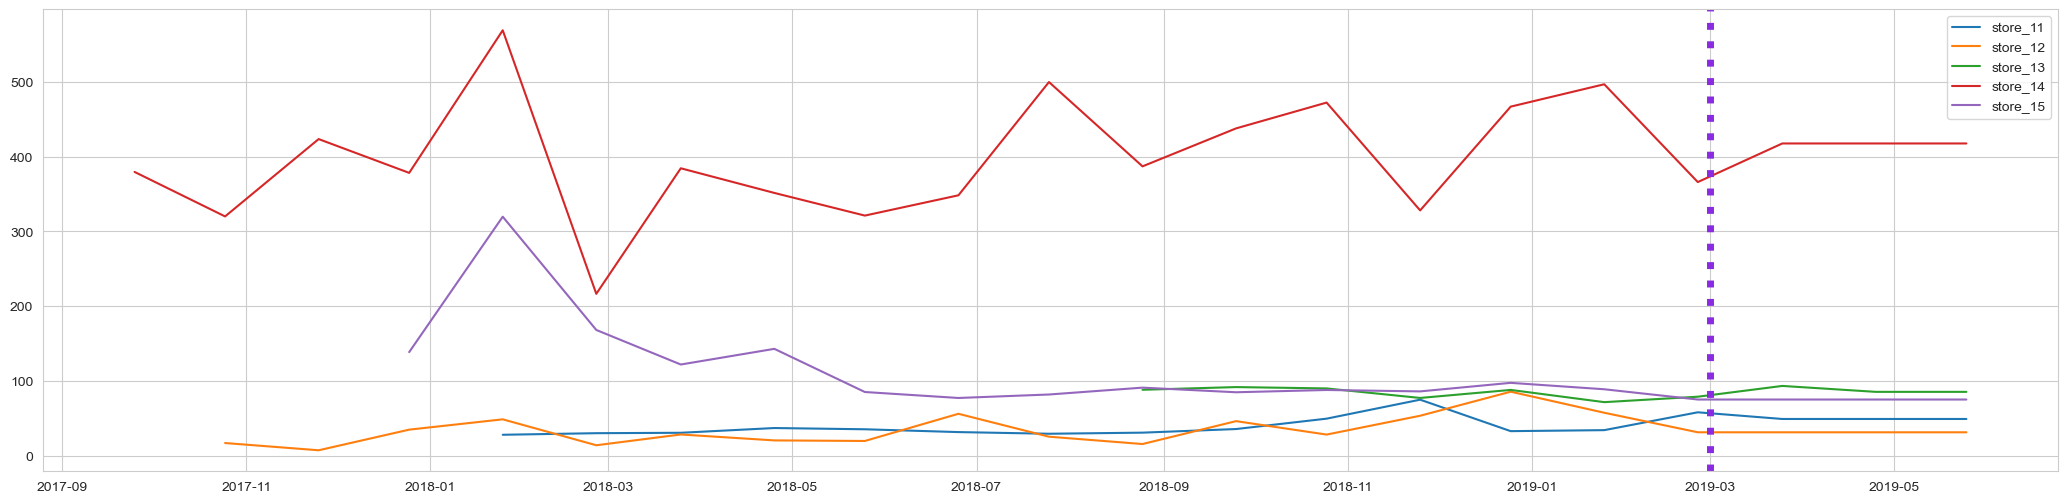

In [132]:
store_plot(predict_amount,10,15)